In [2]:
import pymongo

# launch the daemon

inside the bin dir of mongo
mkdir aulaMONGODB
Macs-MBP-4:bin pedro$ mongod --dbpath aulaMONGODB

# Connect the client

In [2]:
client = pymongo.MongoClient("mongodb://host.docker.internal:32768/")

NameError: name 'pymongo' is not defined

In [4]:
client.list_database_names()

['admin', 'config', 'local', 'med_data']

# import restaurants and neighbourhoods JSON

In [6]:
!wget https://raw.githubusercontent.com/mongodb/docs-assets/primer-dataset/primer-dataset.json

--2023-03-21 20:01:28--  https://raw.githubusercontent.com/mongodb/docs-assets/primer-dataset/primer-dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11874761 (11M) [text/plain]
Saving to: ‘primer-dataset.json’

primer-dataset.json 100%[===================>]  11.32M  8.57MB/s    in 1.3s    

2023-03-21 20:01:31 (8.57 MB/s) - ‘primer-dataset.json’ saved [11874761/11874761]



## See databases

In [ ]:
client.list_database_names()

## Connect to restaurants, reference restaurants

In [12]:
db = client['restaurants']

In [14]:
client['restaurants'].list_collection_names()

[]

In [15]:
restaurants=client['restaurants']['restaurants']

In [17]:
import json
with open('./work/restaurants.json') as f:
  data = f.readlines()
  file_data = json.loads("[" + ",".join(data) + "]")
 
restaurants.insert_many(file_data)

In [52]:
import pprint
for restaurant in restaurants.find()[:5]:
    pprint.pprint(restaurant)

{'_id': ObjectId('641a0e7d5e7639d44270ac41'),
 'address': {'building': '1007',
             'coord': [-73.856077, 40.848447],
             'street': 'Morris Park Ave',
             'zipcode': '10462'},
 'borough': 'Bronx',
 'cuisine': 'Bakery',
 'grades': [{'date': {'$date': 1393804800000}, 'grade': 'A', 'score': 2},
            {'date': {'$date': 1378857600000}, 'grade': 'A', 'score': 6},
            {'date': {'$date': 1358985600000}, 'grade': 'A', 'score': 10},
            {'date': {'$date': 1322006400000}, 'grade': 'A', 'score': 9},
            {'date': {'$date': 1299715200000}, 'grade': 'B', 'score': 14}],
 'name': 'Morris Park Bake Shop',
 'restaurant_id': '30075445'}
{'_id': ObjectId('641a0e7d5e7639d44270ac42'),
 'address': {'building': '469',
             'coord': [-73.961704, 40.662942],
             'street': 'Flatbush Avenue',
             'zipcode': '11225'},
 'borough': 'Brooklyn',
 'cuisine': 'Hamburgers',
 'grades': [{'date': {'$date': 1419897600000}, 'grade': 'A', 'score

## Compute the average scores of the restaurants. 

We pass an array to the aggregate function. 

The $unwind parameter is used to deconstruct the grades array in order to output a document for each element. 

Next we use the $match parameter including everything (by using open and closing braces). We could filter further here by providing additional criteria. 

Next we use the $group parameter to group the data that we want to apply the computation to. 

Finally we create new key called “Avg grade” and apply the $avg (average) parameter to the grades scores of individual restaurants referencing grades followed by a dot and the score key.

There are many other parameters that can be used for common computations such as $sum, $min, $max etc.

In [172]:
#complete the next code to do it...see the result...WHY DOES IT NOT WORK? go back to understand based 
#on restaurants data

result = restaurants.aggregate(
  [
     {"$match": {}}, 
     {"$group": {"_id": "$restaurant_id", "Avg grade": {"$avg": "$grades.score" }
      }
      }
  ]
)

In [173]:
for item in list(result)[:20]:
    print(item)

{'_id': '50001415', 'Avg grade': None}
{'_id': '41294917', 'Avg grade': None}
{'_id': '41058103', 'Avg grade': None}
{'_id': '41329496', 'Avg grade': None}
{'_id': '41461464', 'Avg grade': None}
{'_id': '41538914', 'Avg grade': None}
{'_id': '50002354', 'Avg grade': None}
{'_id': '50005630', 'Avg grade': None}
{'_id': '41313420', 'Avg grade': None}
{'_id': '40889676', 'Avg grade': None}
{'_id': '50011120', 'Avg grade': None}
{'_id': '50015072', 'Avg grade': None}
{'_id': '41278303', 'Avg grade': None}
{'_id': '40387086', 'Avg grade': None}
{'_id': '41637060', 'Avg grade': None}
{'_id': '41500477', 'Avg grade': None}
{'_id': '41519339', 'Avg grade': None}
{'_id': '41699005', 'Avg grade': None}
{'_id': '50010813', 'Avg grade': None}
{'_id': '50015399', 'Avg grade': None}


In [174]:
#do it again, but now add unwind. See the result table....What does unwind do, what changes and why does it 
#work now?

result = restaurants.aggregate(
  [
     {"$unwind": "$grades"},
     {"$match": {}}, 
     {"$group": {"_id": "$restaurant_id", "Avg grade": {"$avg": "$grades.score" }}}
  ]
)

In [175]:
#redo query but now also sort the returned in ascending or descending order. 
#We could simply add another line with the sort parameter specifying which field to sort by. 
#1 (ascending) or -1 (descending).

#do it again, but now add unwind. See the result table....What does unwind do, what changes and why does it 
#work now?

result = restaurants.aggregate(
  [
     {"$unwind": "$grades"},
     {"$match": {}}, 
     {"$group": {"_id": "$restaurant_id", "Avg grade": {"$avg": "$grades.score" }}},
     {"$sort": {"Avg grade": -1}}
  ]
)

In [176]:
#print result, see if ot is sorted correctly:
for item in list(result)[:20]:
    print(item)

{'_id': '50015959', 'Avg grade': 75.0}
{'_id': '50017374', 'Avg grade': 73.0}
{'_id': '50018457', 'Avg grade': 69.0}
{'_id': '50015245', 'Avg grade': 69.0}
{'_id': '41703965', 'Avg grade': 65.0}
{'_id': '50017252', 'Avg grade': 61.0}
{'_id': '50011285', 'Avg grade': 61.0}
{'_id': '50013507', 'Avg grade': 60.0}
{'_id': '50011359', 'Avg grade': 60.0}
{'_id': '50018376', 'Avg grade': 58.0}
{'_id': '50016721', 'Avg grade': 56.0}
{'_id': '50016506', 'Avg grade': 56.0}
{'_id': '50015482', 'Avg grade': 56.0}
{'_id': '50018079', 'Avg grade': 56.0}
{'_id': '50018468', 'Avg grade': 56.0}
{'_id': '50016149', 'Avg grade': 54.0}
{'_id': '50000607', 'Avg grade': 53.0}
{'_id': '41720129', 'Avg grade': 53.0}
{'_id': '50018202', 'Avg grade': 53.0}
{'_id': '50016844', 'Avg grade': 52.0}


# Convert data from a Mongo database into tabular form as a Panda’s dataframe object

In [42]:
import pandas as pd

extracted_data = restaurants.find({},{"borough": "Bronx", "cuisine": "Bakery", "name": 1})
bronx_bakeries = list(extracted_data)

bakeries=pd.DataFrame.from_dict(bronx_bakeries)
bakeries = bakeries.set_index("_id")

In [43]:
bakeries

,name,borough,cuisine
_id,,,
641a0e7d5e7639d44270ac41,Morris Park Bake Shop,Bronx,Bakery
641a0e7d5e7639d44270ac42,Wendy'S,Bronx,Bakery
641a0e7d5e7639d44270ac43,Dj Reynolds Pub And Restaurant,Bronx,Bakery
641a0e7d5e7639d44270ac44,Riviera Caterer,Bronx,Bakery
641a0e7d5e7639d44270ac45,Tov Kosher Kitchen,Bronx,Bakery
...,...,...,...
641a0e7d5e7639d442710f4b,Subway,Bronx,Bakery
641a0e7d5e7639d442710f4c,Fairfield Inn Suites Penn Station,Bronx,Bakery
641a0e7d5e7639d442710f4d,,Bronx,Bakery


# Using the mongodb query and a python dataframe:

Show a table and a chart with the average ratings per restarurant, the top 5 and the tail 5. 

Since the tail 5 will show no valid info, remove nulls and also remove those with avg rating 0,
show the remianing ones


In [162]:
#complete the code:

result = restaurants.aggregate( 
  [
     {"$match": {}}, 
     {"$unwind": "$grades"},
     {"$group": {"_id": "$restaurant_id", "Avg grade": {"$avg": "$grades.score" }}},
  ]
)
bakeriesAVGPD=pd.DataFrame(list(result))
bakeriesAVGPD=bakeriesAVGPD.dropna().sort_values("Avg grade",ascending=False)

In [74]:
pd.concat([bakeriesAVGPD.head(5),bakeriesAVGPD.tail(5)])

,_id,Avg grade
19669,50015959,75.0
17078,50017374,73.0
2141,50015245,69.0
13859,50018457,69.0
12270,41703965,65.0
19573,50012467,0.0
5010,41694724,0.0
9653,50015809,0.0
6559,50000576,0.0
13451,50012634,-1.0


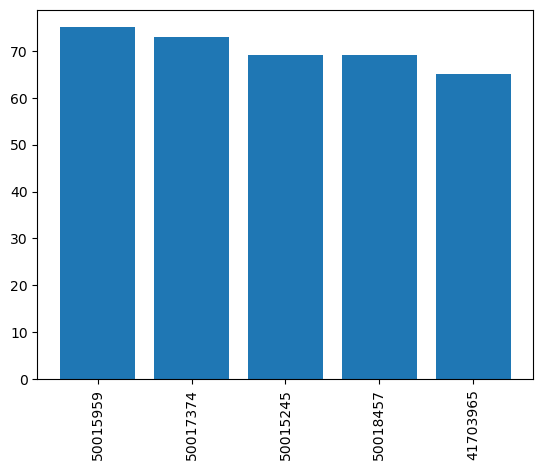

In [75]:
#complete to plot the top 5 chart:

import matplotlib.pyplot as plt

plt.bar(bakeriesAVGPD.head(5)['_id'],bakeriesAVGPD.head(5)["Avg grade"])
plt.xticks(rotation=90)
plt.show()

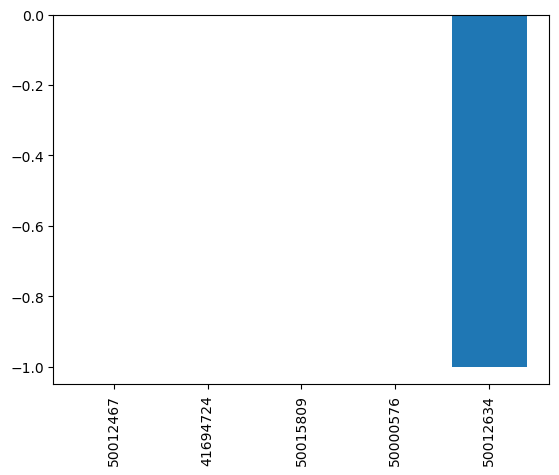

In [77]:
#complete to plot the top 5 chart:

import matplotlib.pyplot as plt

plt.bar(bakeriesAVGPD.tail(5)['_id'],bakeriesAVGPD.tail(5)["Avg grade"])
plt.xticks(rotation=90)
plt.show()

In [80]:
#drop rows with null values and complete the following code to work well

filter = bakeriesAVGPD["Avg grade"]>0
  
# filtering data
bakeriesAVGPD1=bakeriesAVGPD.where(filter, inplace = False)
  
# display
bakeriesAVGPD1.dropna()

,_id,Avg grade
19669,50015959,75.000000
17078,50017374,73.000000
2141,50015245,69.000000
13859,50018457,69.000000
12270,41703965,65.000000
...,...,...
23399,41618402,0.666667
1974,41618440,0.666667
3577,41618385,0.666667
5296,41611748,0.500000


# Next we want to see avergae grades per LOCATION (borough=neighborhood) instead of per restaurant

In [157]:

# Show tables with the average, max and stdev ratings per location, charts with top 5, tail 5 and all of average 
# rating

result = restaurants.aggregate(
  [
    {"$match": {"borough":{"$ne": None}}},
    {"$unwind": "$grades"},
     {"$facet" : {
      "Borough" : [{"$group": {"_id": "$borough"}}],
      "Avg" : [{"$group": {"_id": "$borough", "V": {"$avg": "$grades.score" }}}],
      "Max" : [{"$group": {"_id": "$borough", "V": {"$max": "$grades.score" }}}],
      "Stdev" : [{"$group": {"_id": "$borough", "V": {"$stdDevPop": "$grades.score" }}}],
      "Bot5" : [{"$group": {"_id": "$borough", "V": {
        "$bottomN": {"n":5 , "output": [ "$grades.score" ],"sortBy": { "grades.score": -1 },}}}}
        ],
      "Top5" : [{"$group": {"_id": "$borough", "V": {
        "$topN": {"n":5 , "output": [ "$grades.score" ],"sortBy": { "grades.score": -1 },}}}}
        ],
     }
     },
  ]
)

bakeriesAVG = list(result)

bakeriesAVGPD=pd.DataFrame.from_dict(*bakeriesAVG)
bakeriesAVG

[{'Borough': [{'_id': 'Manhattan'},
   {'_id': 'Bronx'},
   {'_id': 'Staten Island'},
   {'_id': 'Missing'},
   {'_id': 'Queens'},
   {'_id': 'Brooklyn'}],
  'Avg': [{'_id': 'Brooklyn', 'V': 11.44797595737899},
   {'_id': 'Manhattan', 'V': 11.418151216986018},
   {'_id': 'Staten Island', 'V': 11.370957711442786},
   {'_id': 'Missing', 'V': 9.632911392405063},
   {'_id': 'Queens', 'V': 11.634865110930088},
   {'_id': 'Bronx', 'V': 11.036186099942562}],
  'Max': [{'_id': 'Bronx', 'V': 82},
   {'_id': 'Brooklyn', 'V': 86},
   {'_id': 'Manhattan', 'V': 131},
   {'_id': 'Queens', 'V': 84},
   {'_id': 'Staten Island', 'V': 68},
   {'_id': 'Missing', 'V': 47}],
  'Stdev': [{'_id': 'Bronx', 'V': 7.017117017155606},
   {'_id': 'Manhattan', 'V': 7.433047046784533},
   {'_id': 'Staten Island', 'V': 6.623126963476623},
   {'_id': 'Missing', 'V': 6.610649664908034},
   {'_id': 'Queens', 'V': 7.252487538887249},
   {'_id': 'Brooklyn', 'V': 7.392521214522643}],
  'Bot5': [{'_id': 'Missing', 'V': [[2]

In [ ]:
#complete to show the head and tail 5

import matplotlib.pyplot as plt

plt.bar(*bakeriesAVGPD["Top5"],bakeriesAVGPD.head(5)["?"])
plt.xticks(rotation=90)
plt.show()

?

In [ ]:
#complete to show all values

plt.bar(bakeriesAVGPD['?'],bakeriesAVGPD["?"])
plt.xticks(rotation=90)
plt.show()

# The end !!!!